# Performance Test Analysis

### Setup

In [1]:
from util import *

### Load data

In [2]:
all_data = load_data("data")
display(all_data)


Loaded test cases: 
  data\base.csv
  data\it_nimo.csv
  data\noalloc.csv
  data\turbo1.csv
  data\turbo2.csv
  data\turbo3.csv
  data\turbo4.csv
  data\turbo5.csv


,session,case,case_name,depth,time,nodes,branching,cutoffs,checkmates,draws,dynamic_allocs
0,base,0,Start state,1,0.00,21,20.00,0.00,0,0,80.0
1,base,0,Start state,2,0.00,205,20.00,1.74,0,0,1757.0
2,base,0,Start state,3,0.01,2802,20.33,1.92,0,0,27430.0
3,base,0,Start state,4,0.37,24888,20.78,6.96,0,0,336905.0
4,base,0,Start state,5,1.36,220160,21.24,5.37,0,0,3036245.0
5,base,0,Start state,6,13.41,3135482,22.70,8.36,0,0,52330673.0
6,base,1,Early game 1,1,0.00,7,6.00,0.00,0,0,247.0
7,base,1,Early game 1,2,0.00,180,24.90,0.41,0,0,6839.0
8,base,1,Early game 1,3,0.01,1875,30.56,7.91,0,0,70928.0
9,base,1,Early game 1,4,0.10,13531,36.14,15.49,0,0,501634.0


#### Remove test cases

In [3]:
sessions_to_remove = [
    "noalloc",
    "it_nimo"
]

all_data = remove_sessions(all_data, sessions_to_remove)

max_depth_data = all_data.loc[all_data['depth'] == 6]

## Search time

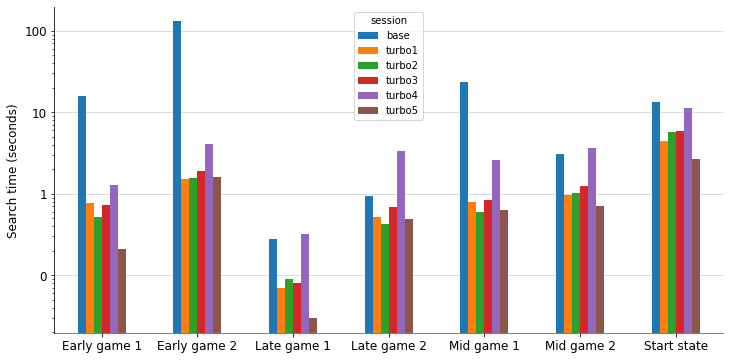

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,15.85,130.27,0.28,0.95,23.36,3.11,13.41
turbo1,0.78,1.53,0.07,0.52,0.79,0.97,4.46
turbo2,0.52,1.55,0.09,0.43,0.60,1.02,5.79
turbo3,0.73,1.88,0.08,0.68,0.83,1.26,5.84
turbo4,1.28,4.13,0.32,3.36,2.59,3.67,11.36
turbo5,0.21,1.61,0.03,0.49,0.64,0.70,2.64


In [4]:
bar_chart(max_depth_data.pivot('case_name','session', 'time'), ylabel="Search time (seconds)", logscale='log') 
display(max_depth_data.pivot('session','case_name','time'))

## Nodes visited

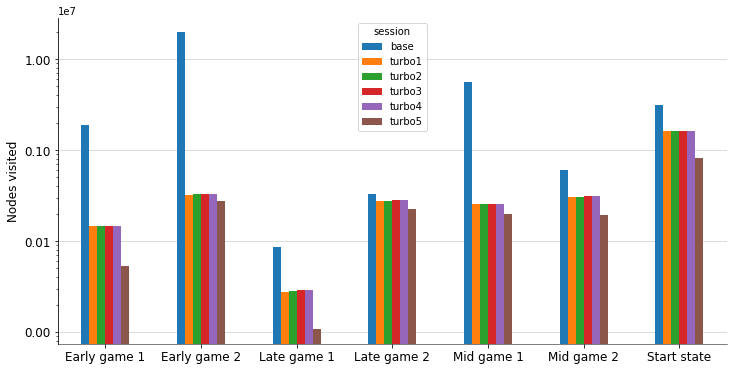

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,1882719,19632972,85467,325669,5627462,609601,3135482
turbo1,147491,322207,27669,275981,253131,307714,1616463
turbo2,148015,332132,28055,276190,253388,308139,1616464
turbo3,148015,332132,28850,280213,253043,309990,1616464
turbo4,148015,332132,28850,280213,253043,309990,1616464
turbo5,52569,272023,10777,224354,197861,193585,810305


In [5]:
bar_chart(max_depth_data.pivot('case_name','session', 'nodes'), ylabel="Nodes visited", logscale=True)
display(max_depth_data.pivot('session','case_name','nodes'))

## Effective Branching Factor

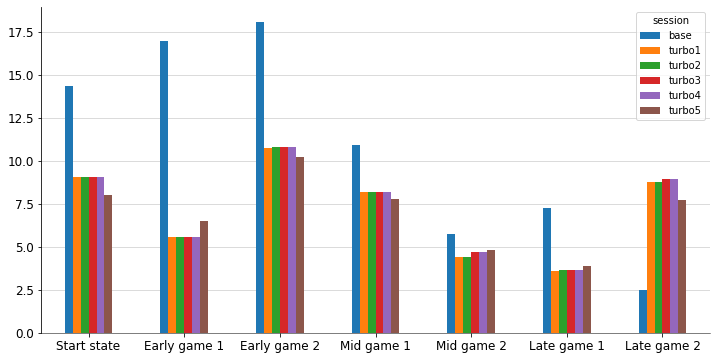

case_name,Start state,Early game 1,Early game 2,Mid game 1,Mid game 2,Late game 1,Late game 2
session,,,,,,,
base,14.34,16.95,18.05,10.93,5.75,7.25,2.50
turbo1,9.06,5.55,10.75,8.18,4.43,3.61,8.74
turbo2,9.06,5.55,10.82,8.17,4.43,3.65,8.74
turbo3,9.06,5.55,10.82,8.16,4.67,3.66,8.96
turbo4,9.06,5.55,10.82,8.16,4.67,3.66,8.96
turbo5,7.98,6.47,10.24,7.75,4.80,3.89,7.74


In [6]:
effective_branching_chart(max_depth_data)

## Branching factor

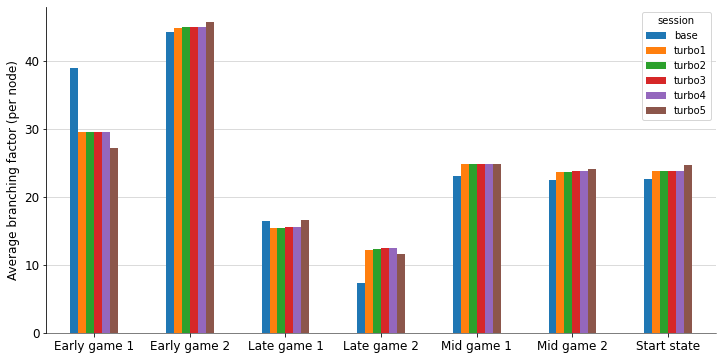

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,39.00,44.29,16.47,7.30,23.04,22.52,22.70
turbo1,29.47,44.86,15.47,12.24,24.82,23.71,23.84
turbo2,29.51,45.06,15.44,12.26,24.85,23.71,23.84
turbo3,29.51,45.06,15.51,12.46,24.86,23.78,23.84
turbo4,29.51,45.06,15.51,12.46,24.86,23.78,23.84
turbo5,27.15,45.70,16.53,11.61,24.78,24.06,24.73


In [7]:
bar_chart(max_depth_data.pivot('case_name','session', 'branching'), ylabel="Average branching factor (per node)")
display(max_depth_data.pivot('session','case_name','branching'))

## Cutoff factor

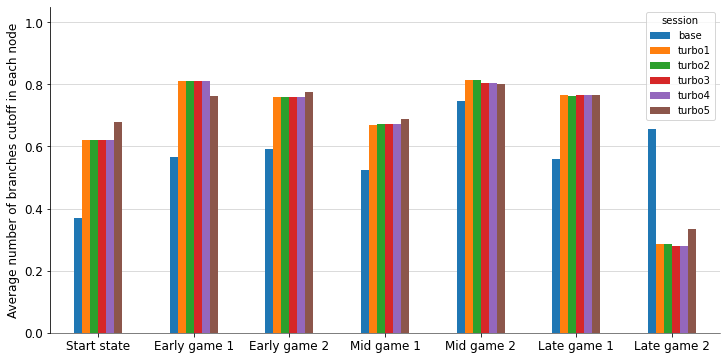

case_name,Start state,Early game 1,Early game 2,Mid game 1,Mid game 2,Late game 1,Late game 2
session,,,,,,,
base,0.368282,0.565385,0.592459,0.525608,0.744671,0.559806,0.657534
turbo1,0.619966,0.811673,0.760366,0.670427,0.813159,0.766645,0.285948
turbo2,0.619966,0.811928,0.759876,0.671227,0.813159,0.763601,0.287113
turbo3,0.619966,0.811928,0.759876,0.671762,0.803616,0.764023,0.280899
turbo4,0.619966,0.811928,0.759876,0.671762,0.803616,0.764023,0.280899
turbo5,0.677315,0.761694,0.775930,0.687248,0.800499,0.764670,0.333333


In [8]:
cutoff_chart(max_depth_data, ylabel="Average number of branches cutoff in each node")

#bar_chart(max_depth_data.pivot('case_name','session', 'cutoffs'), ylabel="Average cutoffs (per node)")
#display(max_depth_data.pivot('session','case_name','cutoffs'))

## Dynamic Allocations

In [9]:
#bar_chart(max_depth_data.pivot('case_name','session', 'dynamic_allocs'), ylabel="Number of dynamic allocations")
#display(max_depth_data.pivot('session','case_name','dynamic_allocs'))

## Visited nodes per depth

__Note__: This is not the number of visited nodes on each depth, but the number of nodes visited when you do a search to the given depth.

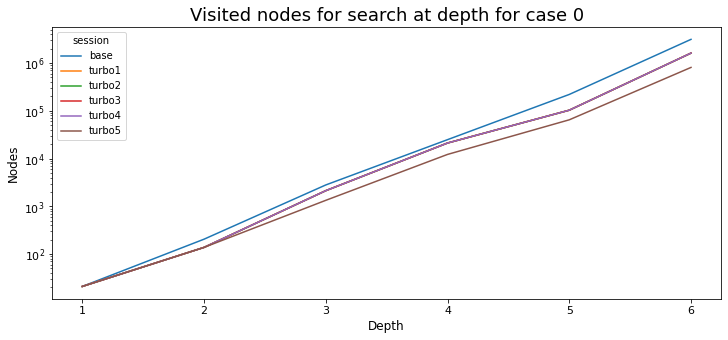

depth,1,2,3,4,5,6
session,,,,,,
base,21,205,2802,24888,220160,3135482
turbo1,21,138,2126,21153,103048,1616463
turbo2,21,138,2126,21153,103048,1616464
turbo3,21,138,2126,21153,103048,1616464
turbo4,21,138,2126,21153,103048,1616464
turbo5,21,138,1335,12210,64782,810305


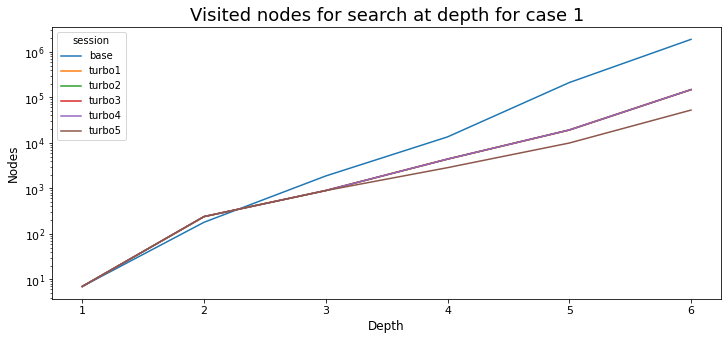

depth,1,2,3,4,5,6
session,,,,,,
base,7,180,1875,13531,211492,1882719
turbo1,7,240,897,4400,19091,147491
turbo2,7,240,897,4400,19209,148015
turbo3,7,240,897,4400,19209,148015
turbo4,7,240,897,4400,19209,148015
turbo5,7,240,895,2853,9921,52569


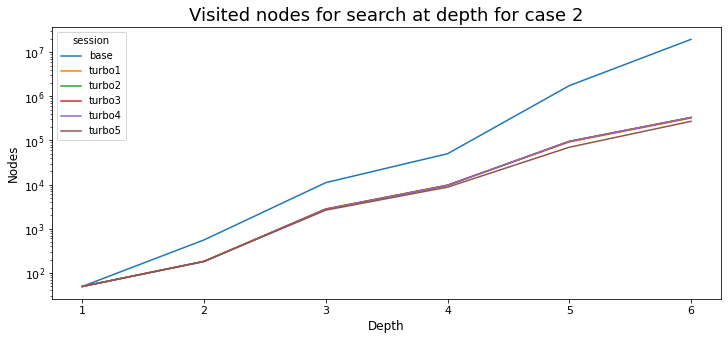

depth,1,2,3,4,5,6
session,,,,,,
base,49,556,11074,50063,1749425,19632972
turbo1,49,181,2819,9712,92307,322207
turbo2,49,181,2763,9632,95458,332132
turbo3,49,181,2763,9632,95458,332132
turbo4,49,181,2763,9632,95458,332132
turbo5,49,182,2633,8740,70211,272023


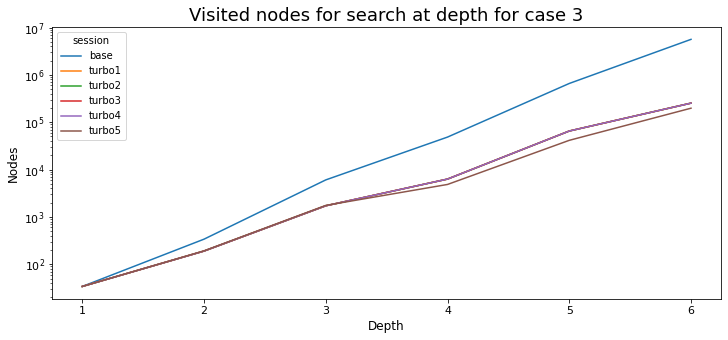

depth,1,2,3,4,5,6
session,,,,,,
base,34,339,6051,48567,658872,5627462
turbo1,34,190,1718,6300,65255,253131
turbo2,34,190,1718,6300,65186,253388
turbo3,34,190,1718,6300,65198,253043
turbo4,34,190,1718,6300,65198,253043
turbo5,34,192,1750,4850,41453,197861


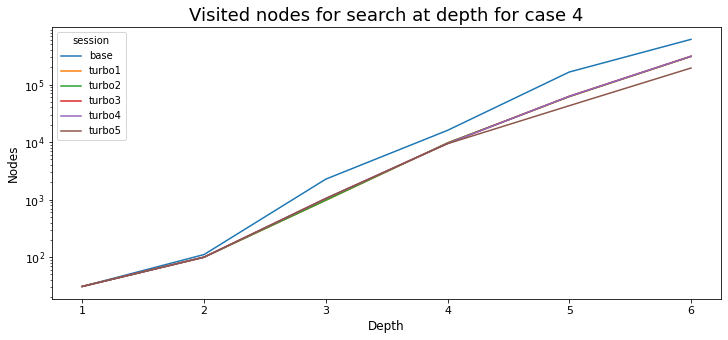

depth,1,2,3,4,5,6
session,,,,,,
base,31,111,2269,15987,164970,609601
turbo1,31,100,975,9663,61752,307714
turbo2,31,100,975,9663,61738,308139
turbo3,31,100,1045,9468,62467,309990
turbo4,31,100,1045,9468,62467,309990
turbo5,31,100,1046,9375,42874,193585


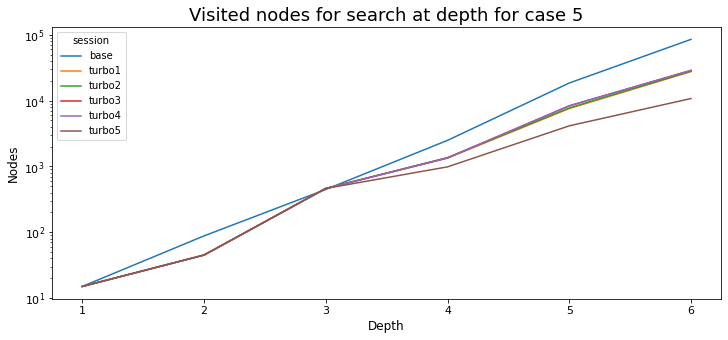

depth,1,2,3,4,5,6
session,,,,,,
base,15,88,447,2492,18544,85467
turbo1,15,45,463,1342,7583,27669
turbo2,15,45,463,1363,7745,28055
turbo3,15,45,463,1347,8349,28850
turbo4,15,45,463,1347,8349,28850
turbo5,15,45,463,986,4142,10777


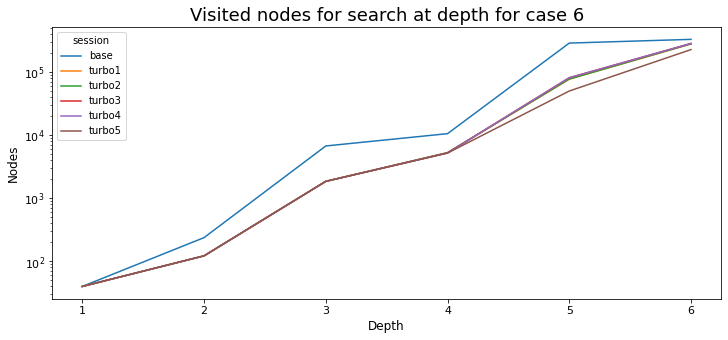

depth,1,2,3,4,5,6
session,,,,,,
base,40,237,6689,10474,284267,325669
turbo1,40,122,1843,5243,76535,275981
turbo2,40,122,1843,5243,76619,276190
turbo3,40,122,1842,5189,80349,280213
turbo4,40,122,1842,5189,80349,280213
turbo5,40,122,1842,5168,49565,224354


In [10]:
 visited_nodes_at_depth(all_data)